# Px Score Discovery EFS - Updated Risk

```{contents}
```

## Where the data at?

In [1]:
import pandas as pd
import sys
sys.path.append('../')

mount = '/mnt/d/'
input_path = '/mnt/d/MethylScore/Intermediate_Files/'
output_path = '/mnt/d/MethylScore/Processed_Data/'
zhou2016_probes_path = '/mnt/d/MethylScore/UnreliableProbesList_Zhou2016/EPIC.anno.GRCh38.tsv'

## Load Data

In [2]:
# read top CpGs selected from previous code file (univariate cox-ph EWAS)
ewas_top_cpgs = pd.read_csv(output_path+'ewas_dmr/ewas_top_cpgs_efs.csv', index_col=0)

# Load clinical data
discovery_clinical_data = pd.read_csv(input_path+'discovery_clinical_data.csv',
                                      low_memory=False, index_col=0).loc[ewas_top_cpgs.index]

# save clinical data
discovery_clinical_data.to_excel('../data/ewas_top_cpgs_clinical_data_discovery.xlsx')

print(
    f' Dataset (df) contains {ewas_top_cpgs.shape[1]} columns (5mC nucleotides/probes) and {ewas_top_cpgs.shape[0]} rows (samples).')

 Dataset (df) contains 112 columns (5mC nucleotides/probes) and 940 rows (samples).


## Standardize Data

Standardize the data so that mean becomes 0 and standard deviation becomes 1.

This is done to avoid biasing the model towards features with large values.

In [3]:
def standardize_data(df, reference_df):
    """Standardize data using mean and standard deviation of reference dataset"""

    # Keep only columns that are in both datasets
    reference_df = reference_df.loc[:, df.columns]

    # Standardize data
    df = (df - reference_df.mean()) / reference_df.std()

    return df

# Standardize data
x_train_m_z = standardize_data(df= ewas_top_cpgs, reference_df= ewas_top_cpgs)

# Save standardized data
# x_test_m_z.to_excel('../data/ewas_top_167_cpgs_M-Values_standardized_discovery_cohort.xlsx')

In [32]:
x_train_m_z.describe().round(2)

,cg06748884,cg00192882,cg25922105,cg08900363,cg18866597,cg08729279,cg06806210,cg18112681,cg06400255,cg12449049,...,cg12172163,cg27627381,cg24397815,cg02320937,cg10196861,cg01312394,cg03572680,cg21637653,cg23886101,cg04544475
count,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,...,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00
mean,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-5.86,-2.72,-8.05,-4.97,-6.68,-6.46,-5.36,-2.54,-3.79,-2.93,...,-3.47,-3.69,-1.63,-5.35,-1.62,-4.41,-4.61,-8.16,-3.01,-6.04
25%,-0.11,-0.67,-0.36,-0.19,-0.31,-0.28,-0.47,-0.69,-0.48,-0.67,...,-0.41,-0.63,-0.55,-0.22,-0.48,-0.26,-0.60,-0.25,-0.81,-0.54
50%,0.31,-0.11,0.17,0.25,0.18,0.25,0.21,-0.00,0.27,-0.05,...,0.22,-0.01,-0.29,0.28,-0.18,0.29,0.21,0.19,0.25,0.09
75%,0.54,0.60,0.61,0.58,0.62,0.61,0.65,0.62,0.72,0.68,...,0.70,0.69,0.09,0.58,0.23,0.63,0.78,0.51,0.83,0.66
max,1.68,3.18,2.05,1.40,1.75,1.79,2.52,3.67,1.93,3.09,...,2.40,3.51,6.41,1.47,10.38,2.03,1.69,3.38,1.76,2.98


In [29]:
x_train_m_z

,cg06748884,cg00192882,cg25922105,cg08900363,cg18866597,cg08729279,cg06806210,cg18112681,cg06400255,cg12449049,...,cg12172163,cg27627381,cg24397815,cg02320937,cg10196861,cg01312394,cg03572680,cg21637653,cg23886101,cg04544475
0003fe29-7b8f-4ef1-b9bc-40306205f1fd_noid,0.073284,2.463303,0.692367,1.135880,0.364160,0.762816,0.745278,-1.084679,0.624575,1.334290,...,0.763217,1.472229,1.825415,0.703442,-0.524231,0.647040,1.203958,-0.155311,0.622150,-0.766112
0037ec75-bb9e-4dbb-a2d9-de1f9bfd2362_noid,-1.370688,-0.300242,-0.527700,0.130483,-0.035183,-0.166054,-0.351133,0.089296,-0.779143,-0.478841,...,0.147753,-0.276831,0.060945,0.562376,-0.605091,-0.013927,0.513332,-0.487711,-0.904544,-0.724987
004c953f-d999-4d82-898d-c091e692df3c_noid,0.526382,-0.750290,-0.234567,0.501794,0.431682,-3.260485,-0.236583,0.274992,0.530041,0.100148,...,0.102913,-1.072641,-0.743735,0.250384,-0.605091,0.115728,-0.203857,-0.424396,0.499795,0.935177
0066d4af-8019-46a0-ba29-d2962c9537a7_noid,0.921192,0.297110,0.036383,0.721153,-1.590115,0.149870,-0.556856,-0.916294,0.507003,0.334554,...,1.018516,1.694859,-0.283918,-0.599101,0.391717,0.823842,0.844079,0.394731,0.582582,0.935177
02b94d3d-2b6f-4c7a-9554-8e6256ddc791_noid,-0.572269,2.785023,0.624233,0.306427,-0.988206,0.499546,0.602674,-0.788038,-0.203198,-0.795325,...,1.041659,2.313549,4.307957,0.529427,6.450641,0.508319,0.412223,0.624244,0.224649,-0.090791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e844b417-c4ad-41db-b361-e93e3c88d3f3_noid,0.127172,1.865047,-1.787380,-1.087418,-0.779853,-2.292463,-0.476204,-0.703059,-2.924044,-0.395283,...,-0.225432,0.271749,-0.775230,0.895992,0.412629,-2.289685,-2.435112,-3.503048,-1.631368,-4.434924
f30fb61d-b08c-4e74-aa50-3a3f0fee6b03_noid,0.491190,-0.058952,0.407157,0.624041,-0.552208,0.711512,-0.044886,-0.782530,0.238493,-0.556483,...,0.317711,0.709629,-0.476034,0.631365,-0.564661,0.180102,0.897204,0.143452,-0.084586,0.658123
f7439a0c-764d-410d-a79e-d323ba2aa10a_noid,0.672648,-0.155649,0.467368,-0.424770,-0.006245,0.373987,0.012389,0.865914,0.296485,0.690969,...,-0.558115,-1.241151,-0.072906,0.597385,-0.690134,-0.944177,-0.718828,-0.155311,0.655021,1.242535
faa32946-e27f-42a3-8b9d-782f7d2a77c9_noid,-2.694788,-0.177338,0.833388,0.472089,0.759646,0.114767,-0.001638,-0.039747,0.398169,-0.098764,...,0.753815,1.234839,-0.574453,1.066919,0.071065,0.493812,0.412223,0.576759,0.544232,-0.558321


## Perform multivariate CoxPH-Lasso

In [4]:
# Import functions to clean up clinical data
import sys
sys.path.append('../')
from source.cox_lasso_functions import *

# Run Cox-Lasso
# raw_coefs = train_coxph_lasso(df=discovery_clinical_data,
#                                 event= 'efs.evnt',
#                                 time= 'efs.time',
#                                 train_x= x_train_m_z,
#                                 cv_n_split=10,
#                                 loops=1000)
# raw_coefs.to_csv(output_path + 'multivariate_cox_lasso/ewas_cog_os_raw_coefs_newrisk_efs.csv')


raw_coefs = pd.read_csv(output_path + 'multivariate_cox_lasso/ewas_cog_os_raw_coefs_newrisk_efs.csv', index_col=0)

Running Cox-Lasso through 1000 loops:


  0%|          | 0/1000 [00:00<?, ?it/s]/home/fmarchi/projects/MethylScore/Code/.venv_py38/lib/python3.8/site-packages/sklearn/pipeline.py:405: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/fmarchi/projects/MethylScore/Code/.venv_py38/lib/python3.8/site-packages/sklearn/pipeline.py:405: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/fmarchi/projects/MethylScore/Code/.venv_py38/lib/python3.8/site-packages/sklearn/pipeline.py:405: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/fmarchi/projects/MethylScore/Code/.venv_py38/lib/python3.8/site-packages/sklearn/pipeline.py:405: UserWarning: all coefficients are zero, consider decreasing alpha.
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/fmarchi/projects/MethylScore/Code/

Cox-Lasso Trained Successfuly!
Selected alpha value: [0.012660303239093649]


### Set Threshold

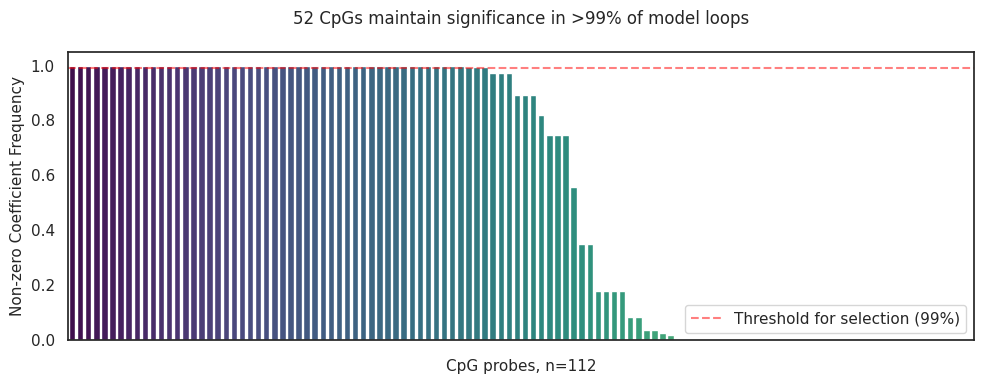

In [23]:
mean_coefs = set_cutoff(coefs=raw_coefs,threshold=0.99)
                                
plot_nonzero_coef_freq(raw_coefs, mean_coefs, threshold=0.99, savefig=False, fig_path=None, figsize=(10,4))


### Save table of CpGs coefficients with EWAS results

In [6]:
# Load `ewas_cpgs_top_OS_with_EFSinfo.xlsx`
# ewas_cpgs_top_OS_with_EFSinfo = pd.read_excel('../data/ewas_cpgs_top_OS_with_EFSinfo.xlsx', index_col=0)\
#     .join(mean_coefs.to_frame('MethylScoreAML Px Coefs')).sort_values('MethylScoreAML Px Coefs', ascending=False)\
#         .to_excel('../data/ewas_cpgs_top_OS_with_EFSinfo_with_MethylScoreAML_Px_Coefs.xlsx')

## Generate Model Results

### Discovery Dataset

In [24]:
score_name = 'MethylScore55_NewRiskEFS'

df, threshold = generate_coxph_score(coef_mean=mean_coefs,
                                        x=x_train_m_z,
                                        df=discovery_clinical_data,
                                        score_name=score_name,
                                        train_test="train",
                                        rpart_outcome='efs.time')

# df.to_excel(output_path + 'multivariate_cox_lasso/ewas_cog_efs_MethylScoreAML_Px_efs.xlsx')

Continuous score cut at the value of 0.217


Text(0.5, 1.0, 'Distribution of MethylScore55_NewRiskEFS in COG trials')

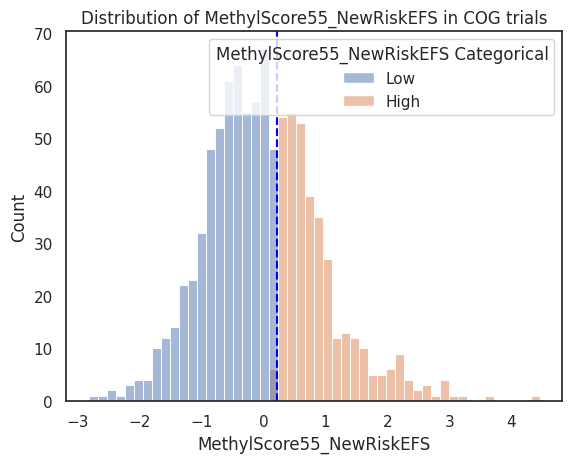

In [25]:
sns.histplot(data=df,x=score_name, bins=50, hue = score_name + ' Categorical' )

# add vertical line at threshold and third quartile
plt.axvline(threshold ,color='blue', linestyle='--')


# add legend
plt.title('Distribution of ' + score_name + ' in COG trials')

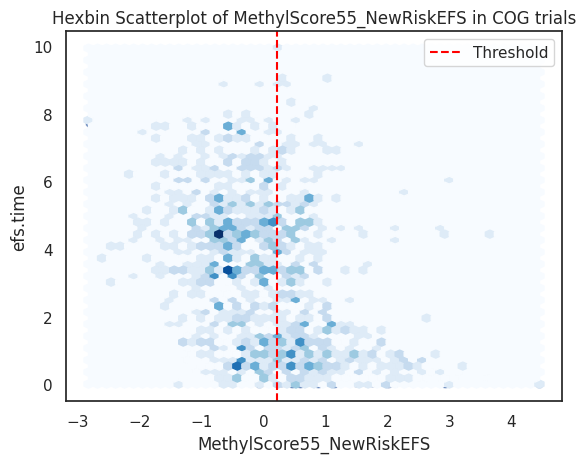

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# create scatterplot 
sns.scatterplot(data=df, x=score_name, y='efs.time', alpha=0.8)

# use hexbin plot to show density
ax = plt.gca()
ax.hexbin(df[score_name], df['os.time'], gridsize=50, cmap='Blues')

# add title
plt.title('Hexbin Scatterplot of {} in COG trials'.format(score_name)) 

# add vertical line at threshold
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.legend()

# save plot as png
# plt.savefig(path + '/Hexbin_Scatterplot_{}_efs.time_{}.png'.format(score_name, len(df)), 
#             bbox_inches='tight', dpi=300)

plt.show()

### Kaplan-Meier Plots

#### Overall study population

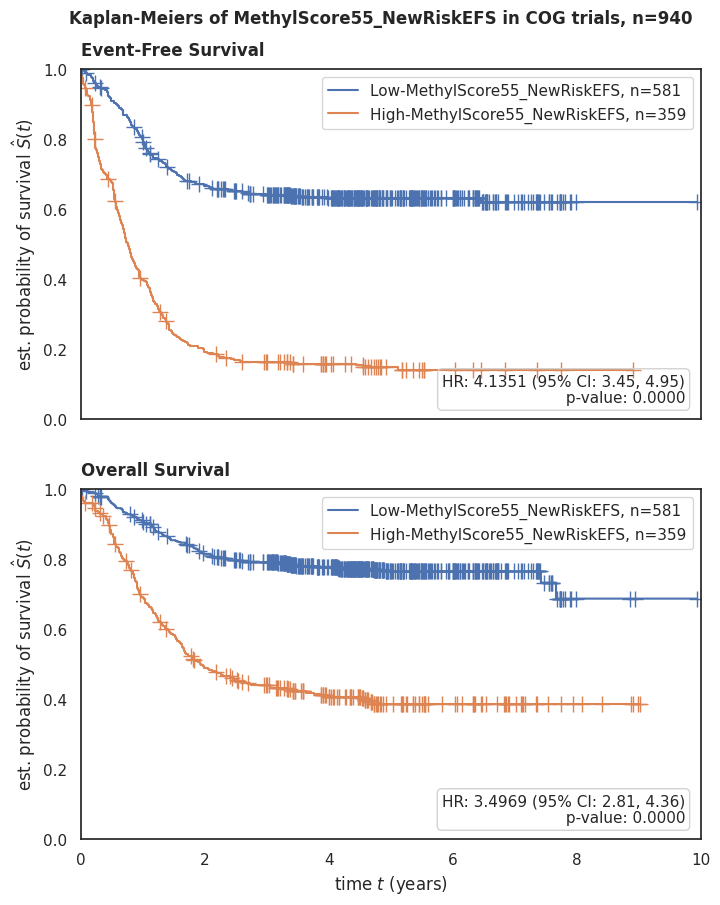

In [27]:
# Import Plotting Functions
from source.data_visualization_functions import *

draw_kaplan_meier(scorename=score_name,
                        df=df,
                        save_plot=False,
                        save_survival_table=True,
                        add_risk_counts=False,
                        trialname='COG trials')

#### Per risk group

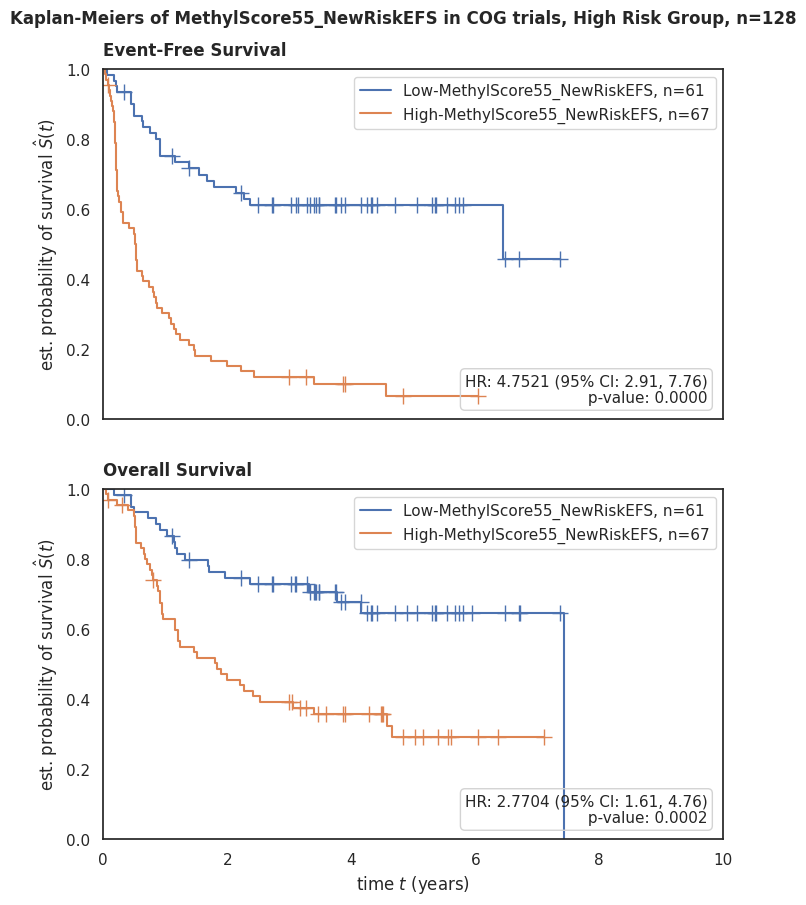

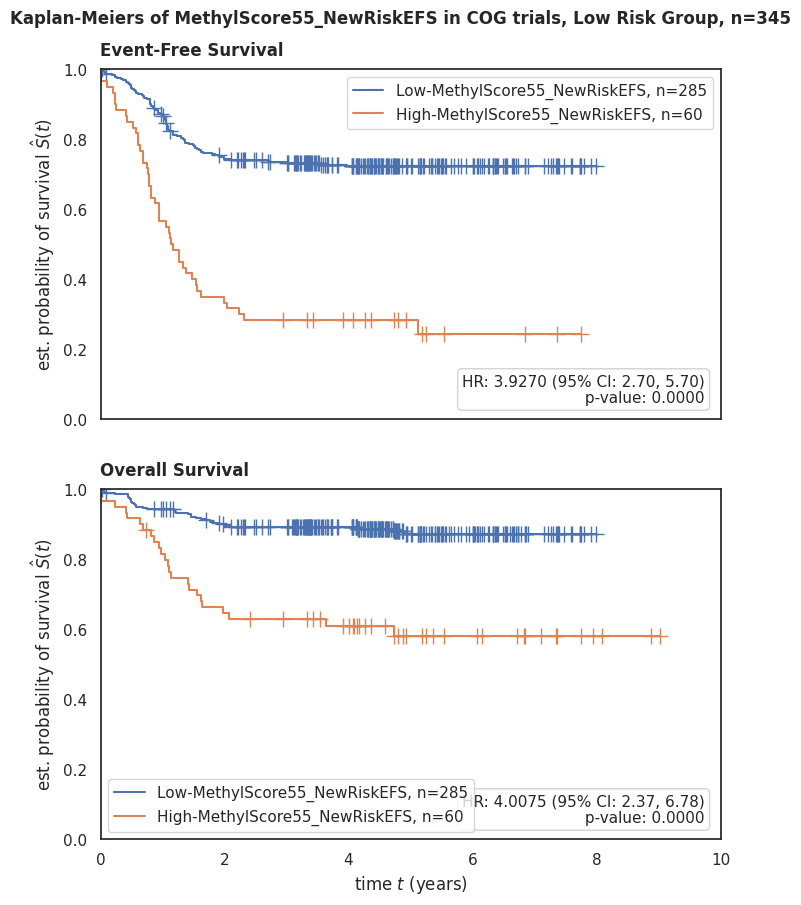

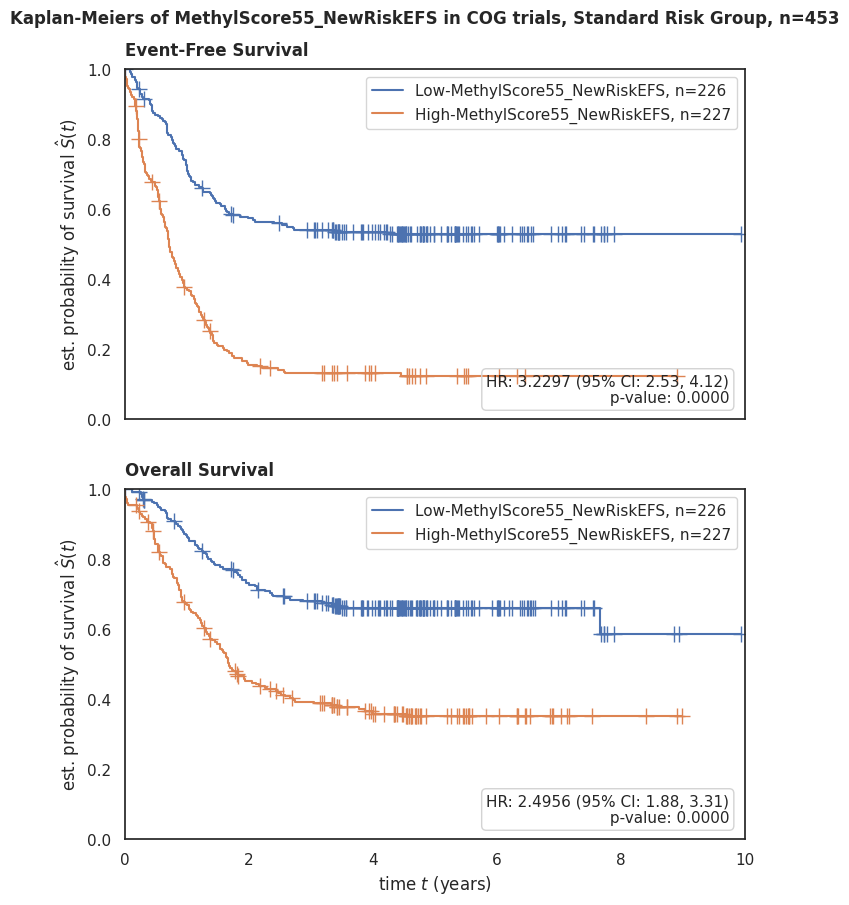

In [11]:
draw_kaplan_meier(scorename=score_name,
                        df=df[df['Risk Group'] == 'High Risk'],
                        save_plot=False,
                        save_survival_table=False,
                        add_risk_counts=False,
                        trialname='COG trials, High Risk Group')

draw_kaplan_meier(scorename=score_name,
                        df=df[df['Risk Group'] == 'Low Risk'],
                        save_plot=False,
                        save_survival_table=False,
                        add_risk_counts=False,
                        trialname='COG trials, Low Risk Group')

draw_kaplan_meier(scorename=score_name,
                        df=df[df['Risk Group'] == 'Standard Risk'],
                        save_plot=False,
                        save_survival_table=False,
                        add_risk_counts=False,
                        trialname='COG trials, Standard Risk Group')

#### Updated risk group

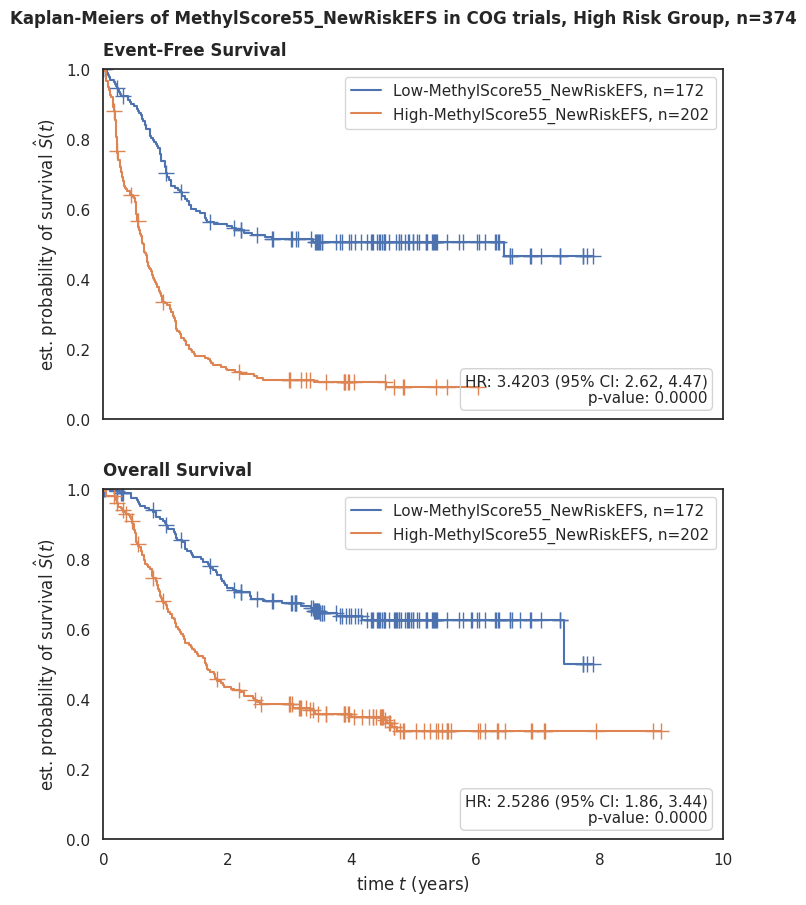

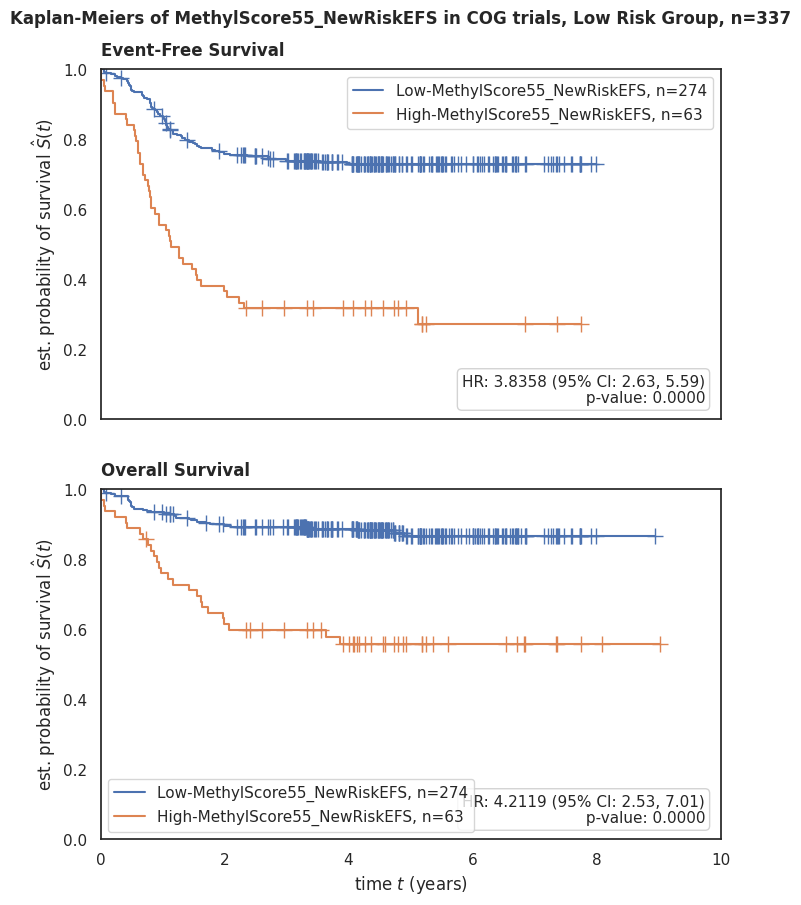

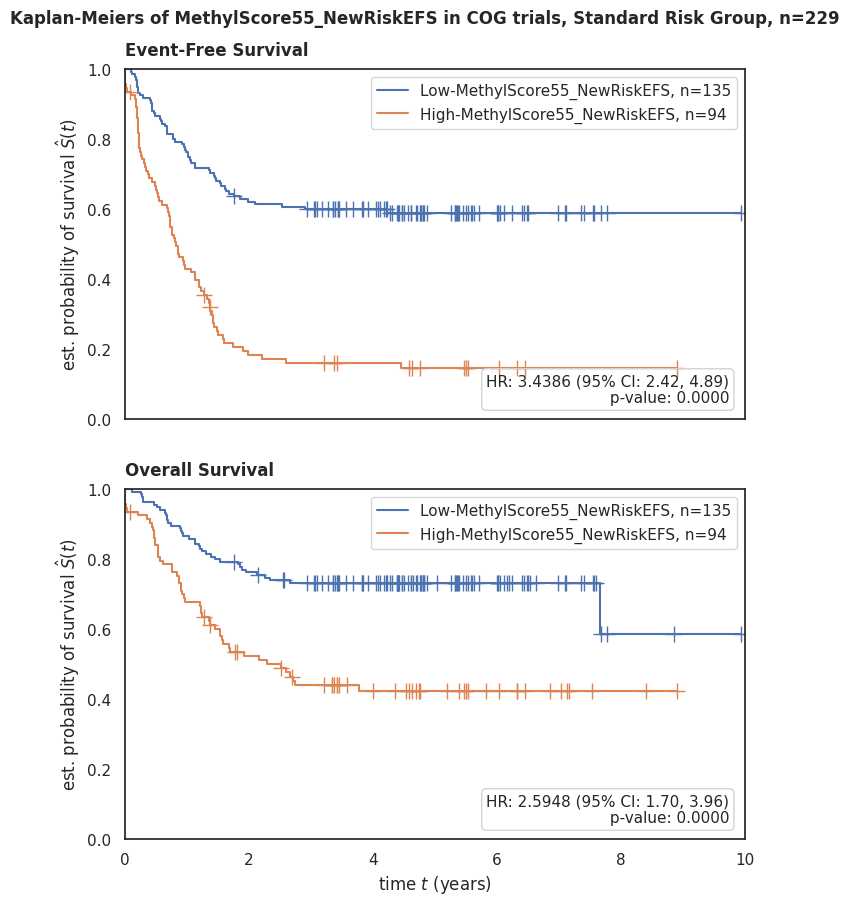

In [28]:
new_risk = pd.read_csv(input_path + 'updated_risk_group_COG_RR_1-10-2024/COG_risk_added_v2_cleanedFM.csv',
                       index_col=0,)
                       
df2 = df.join(new_risk[['Cyto/Molecular Risk']])

draw_kaplan_meier(scorename=score_name,
                        df=df2[df2['Cyto/Molecular Risk'] == 'High'],
                        save_plot=False,
                        save_survival_table=False,
                        add_risk_counts=False,
                        trialname='COG trials, High Risk Group')

draw_kaplan_meier(scorename=score_name,
                        df=df2[df2['Cyto/Molecular Risk'] == 'Low'],
                        save_plot=False,
                        save_survival_table=False,
                        add_risk_counts=False,
                        trialname='COG trials, Low Risk Group')

draw_kaplan_meier(scorename=score_name,
                        df=df2[df2['Cyto/Molecular Risk'] == 'Standard'],
                        save_plot=False,
                        save_survival_table=False,
                        add_risk_counts=False,
                        trialname='COG trials, Standard Risk Group')

### Forest Plots

#### With MRD 1

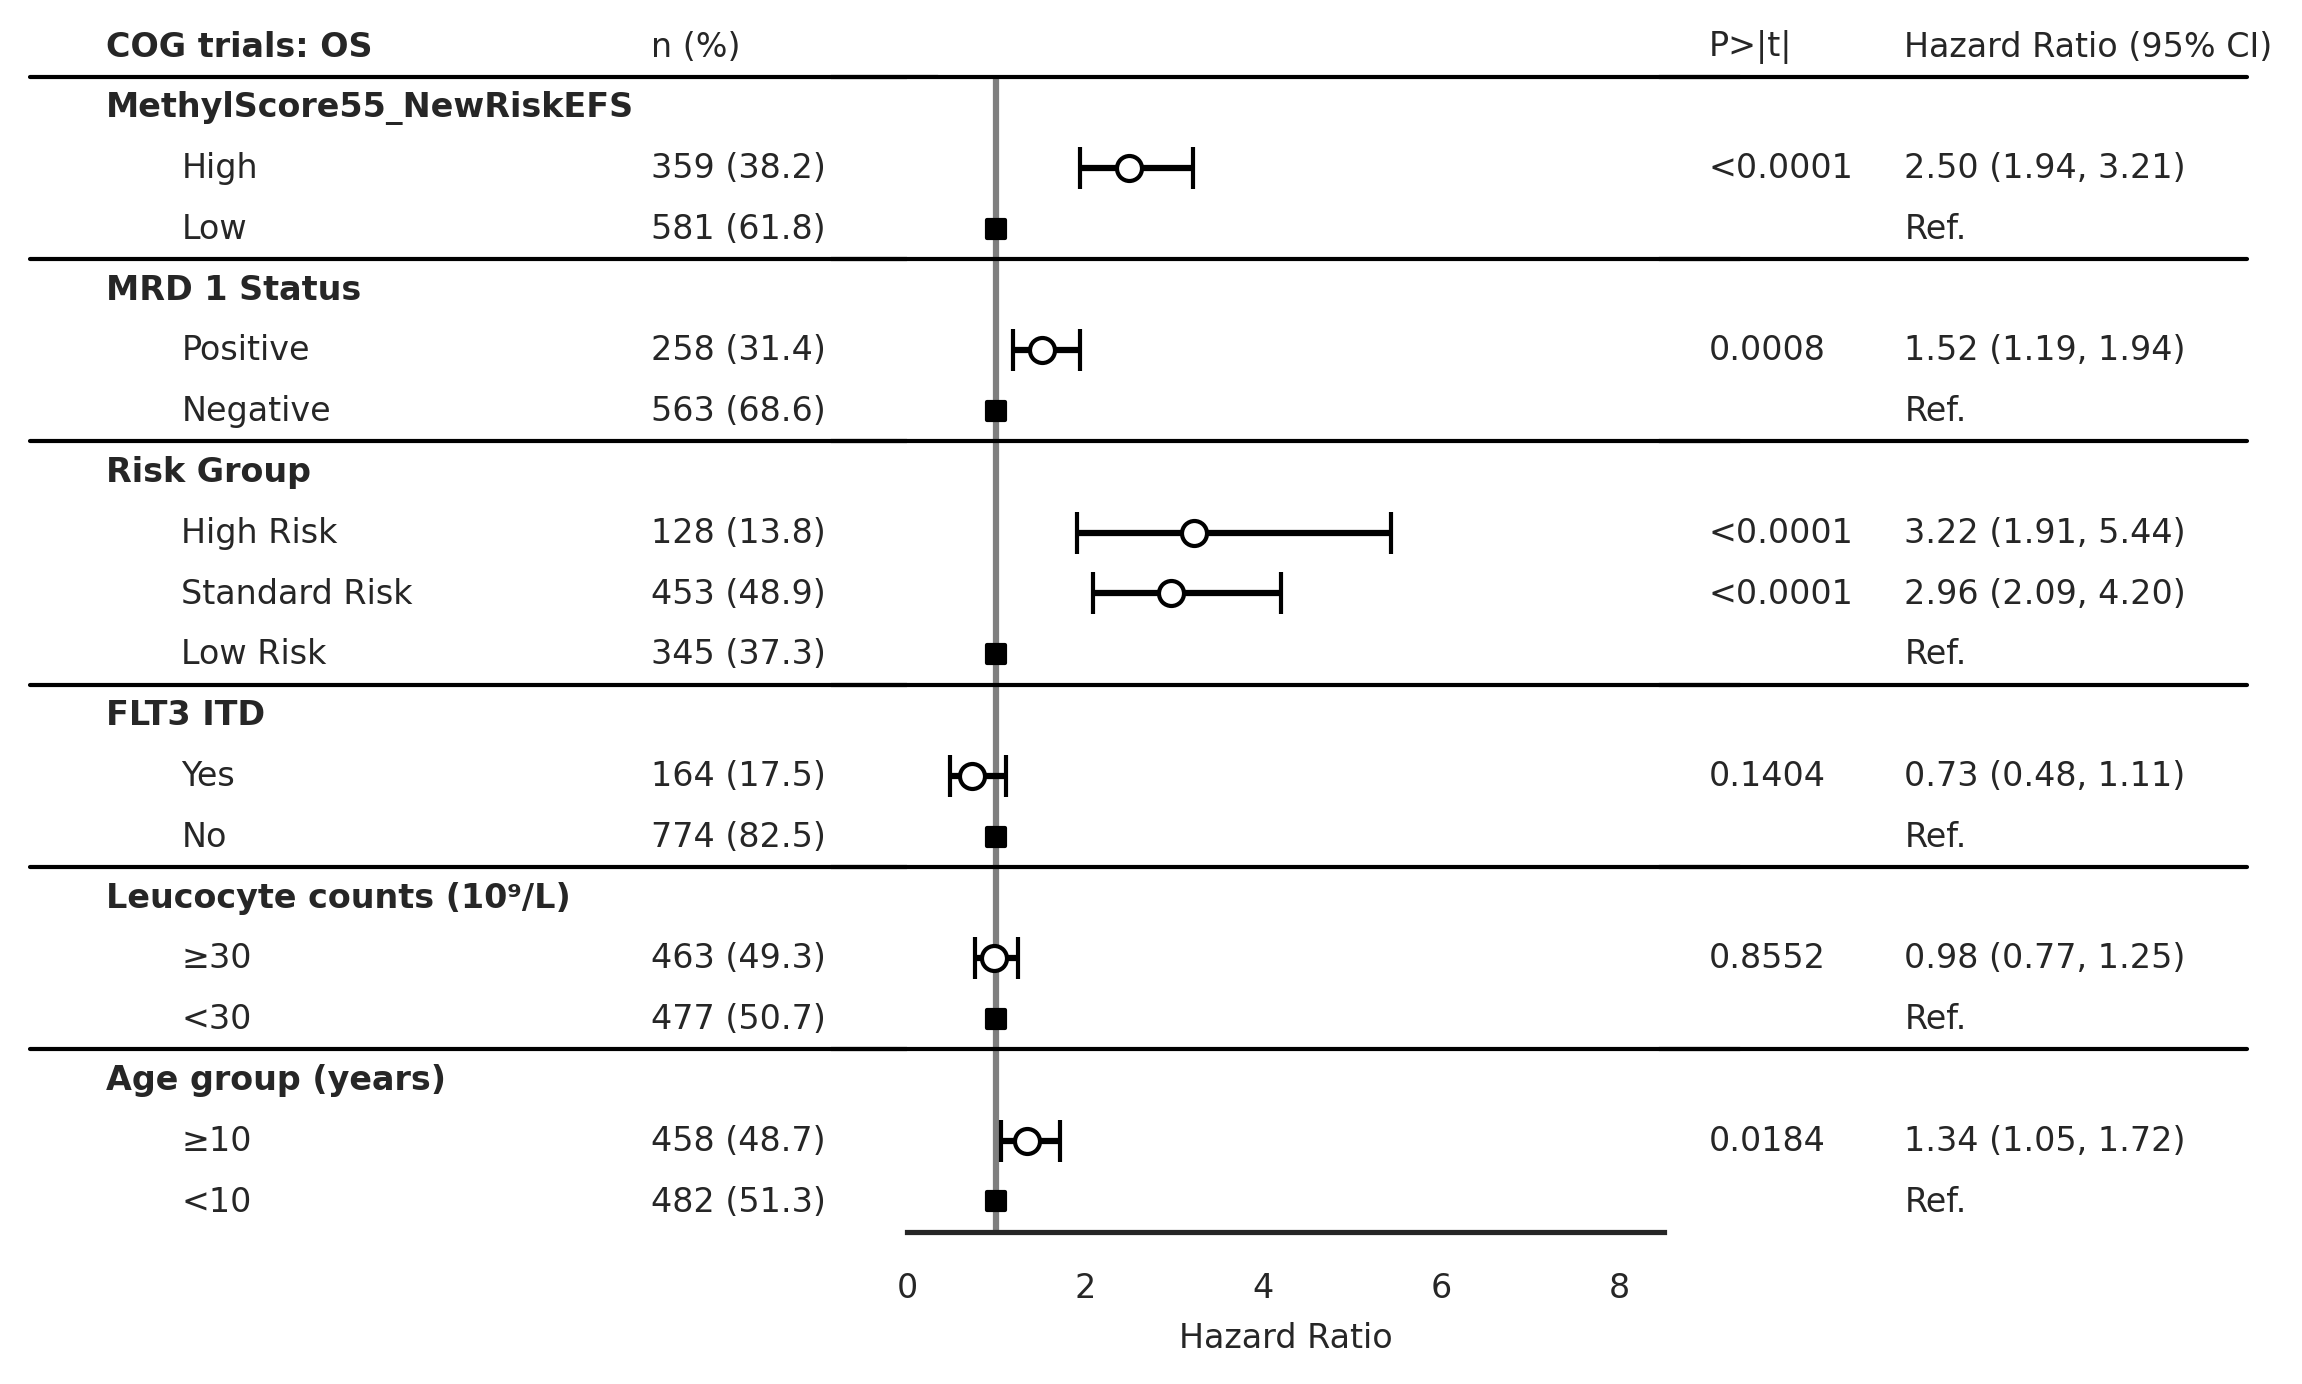

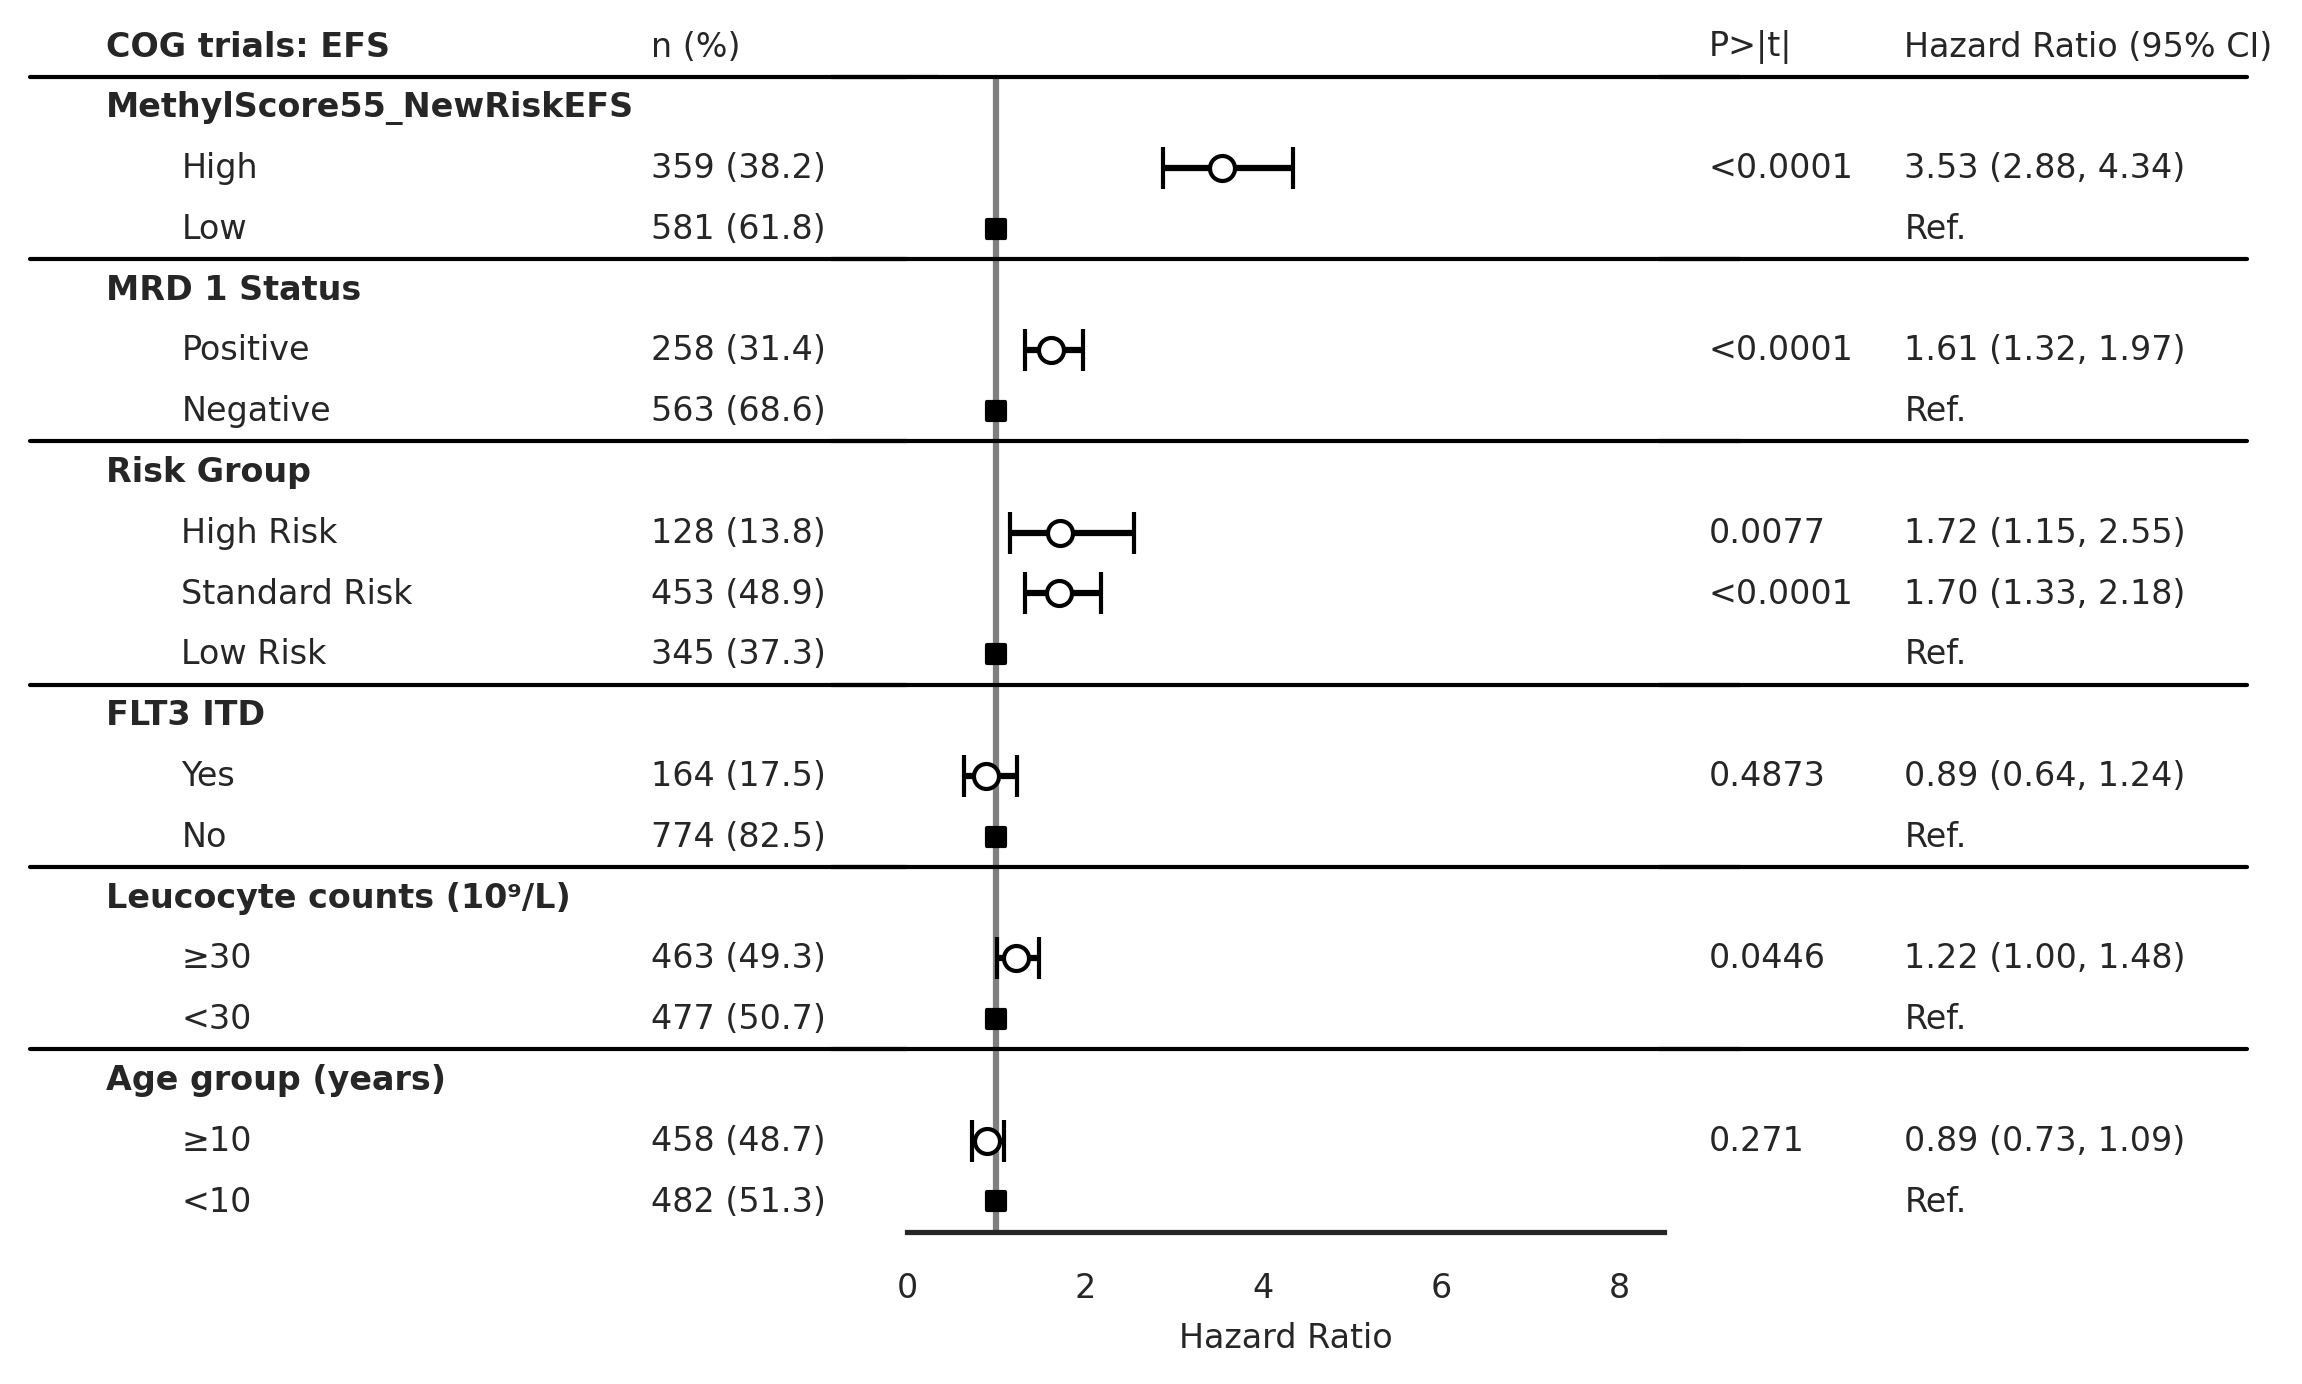

In [13]:

draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=df,
                    trialname='COG trials:',
                    scorename=score_name,
                    save_plot=False)

draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=df,
                    trialname='COG trials:',
                    scorename=score_name,
                    save_plot=False)

#### Without MRD 1

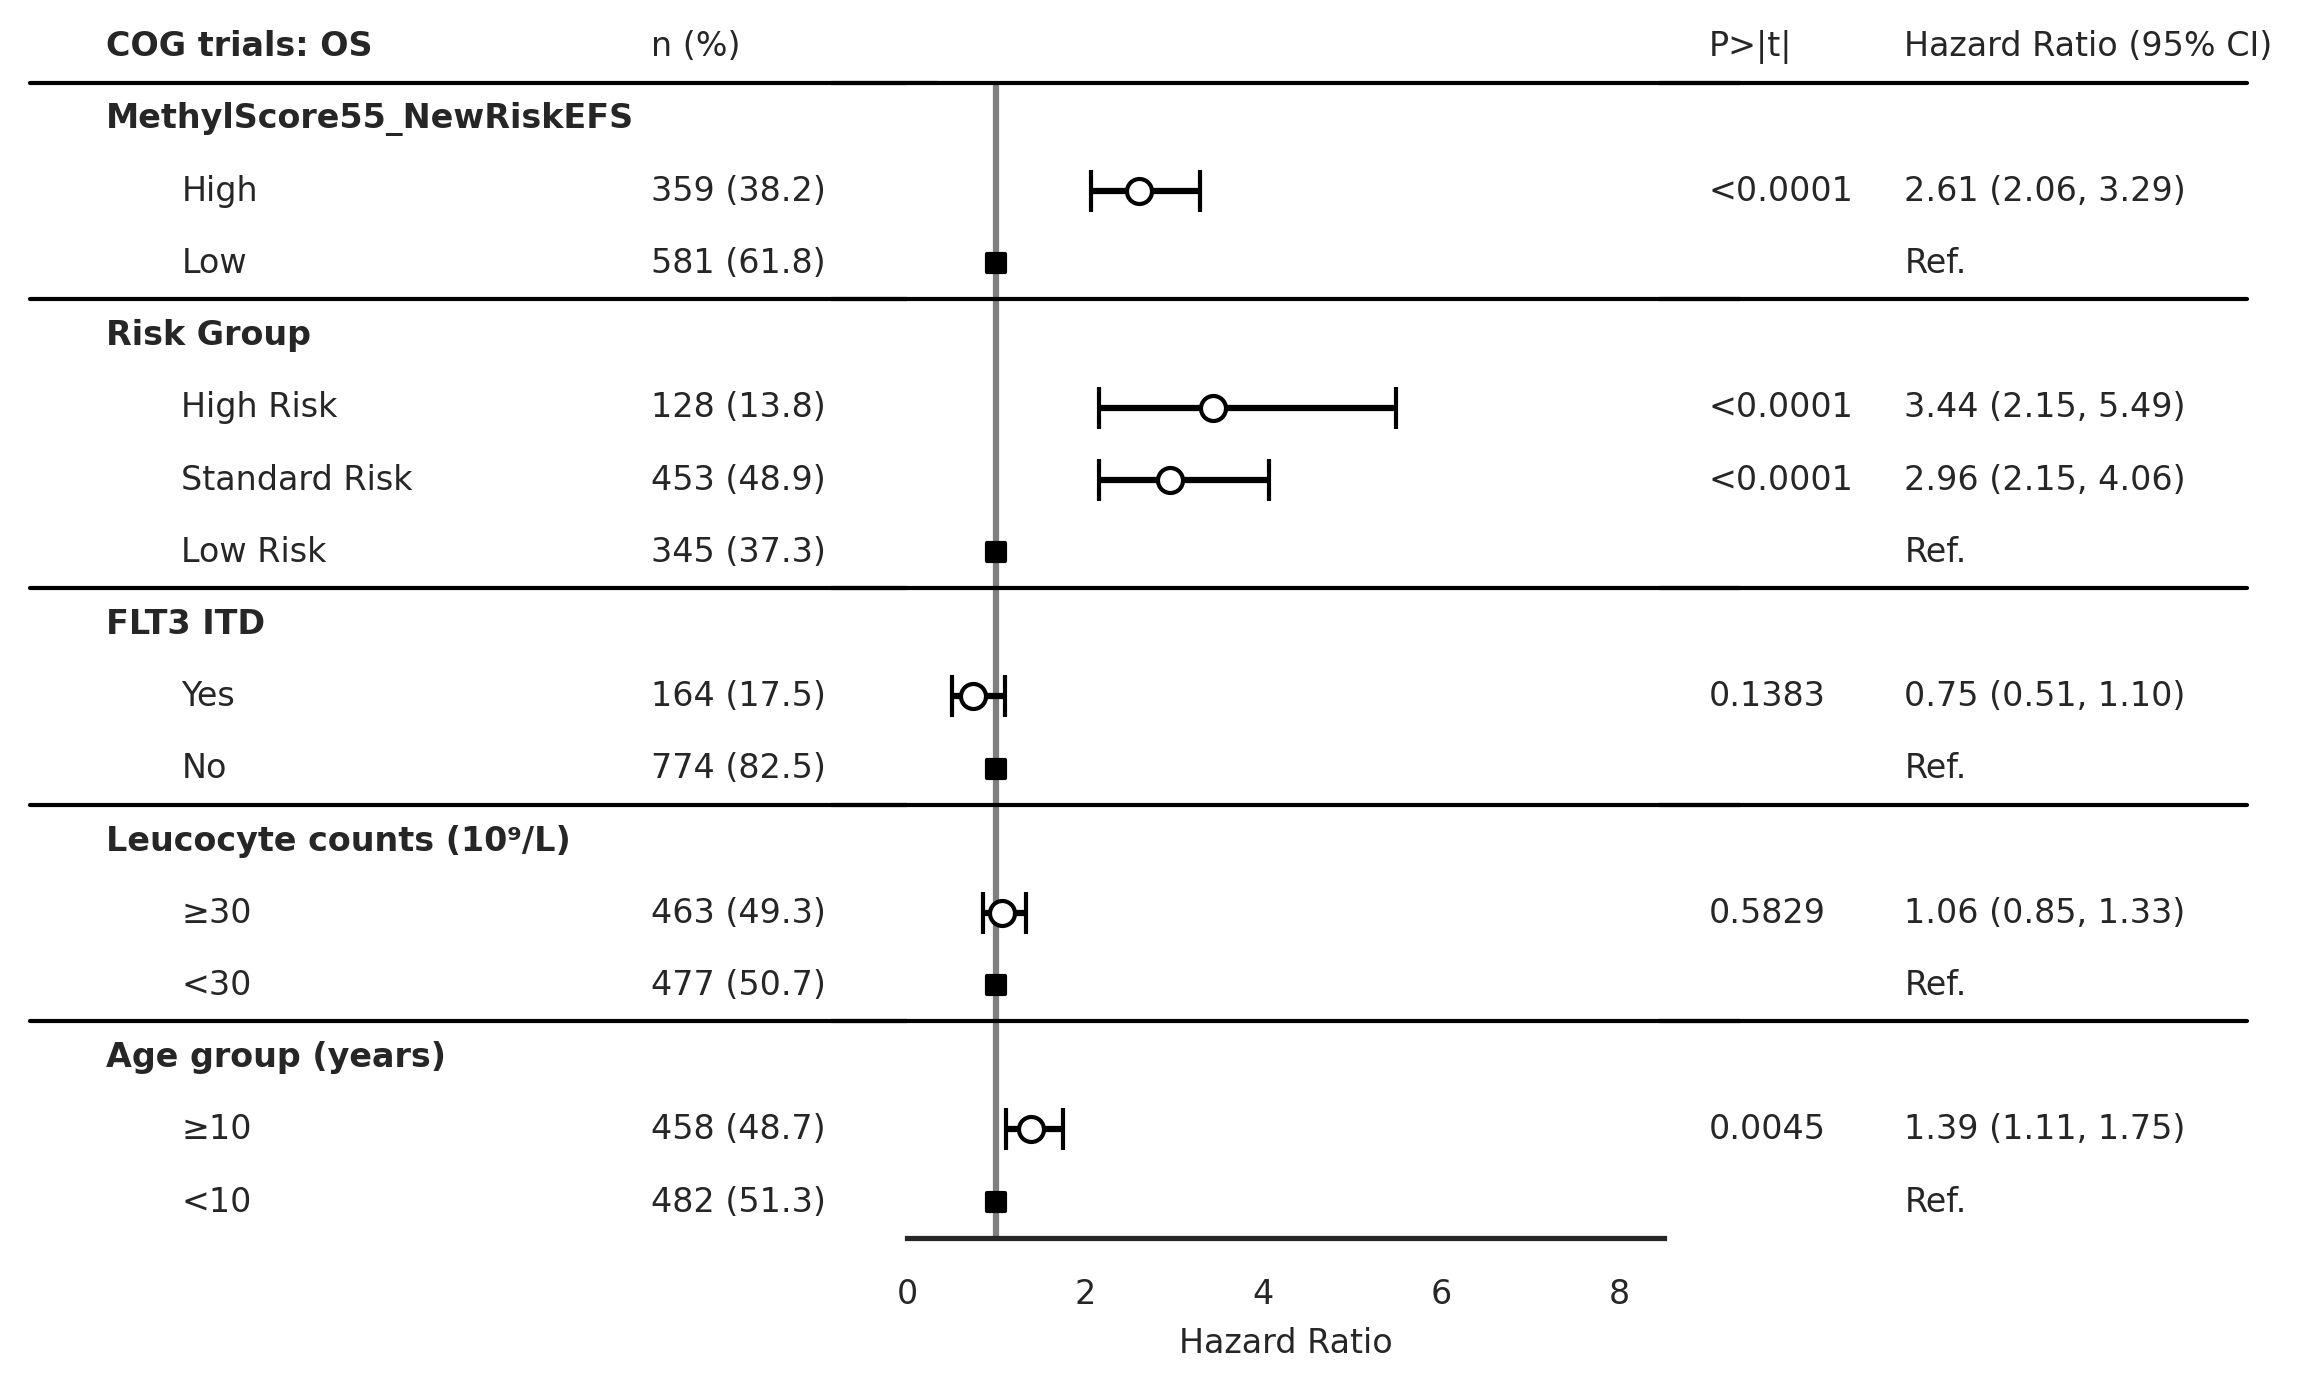

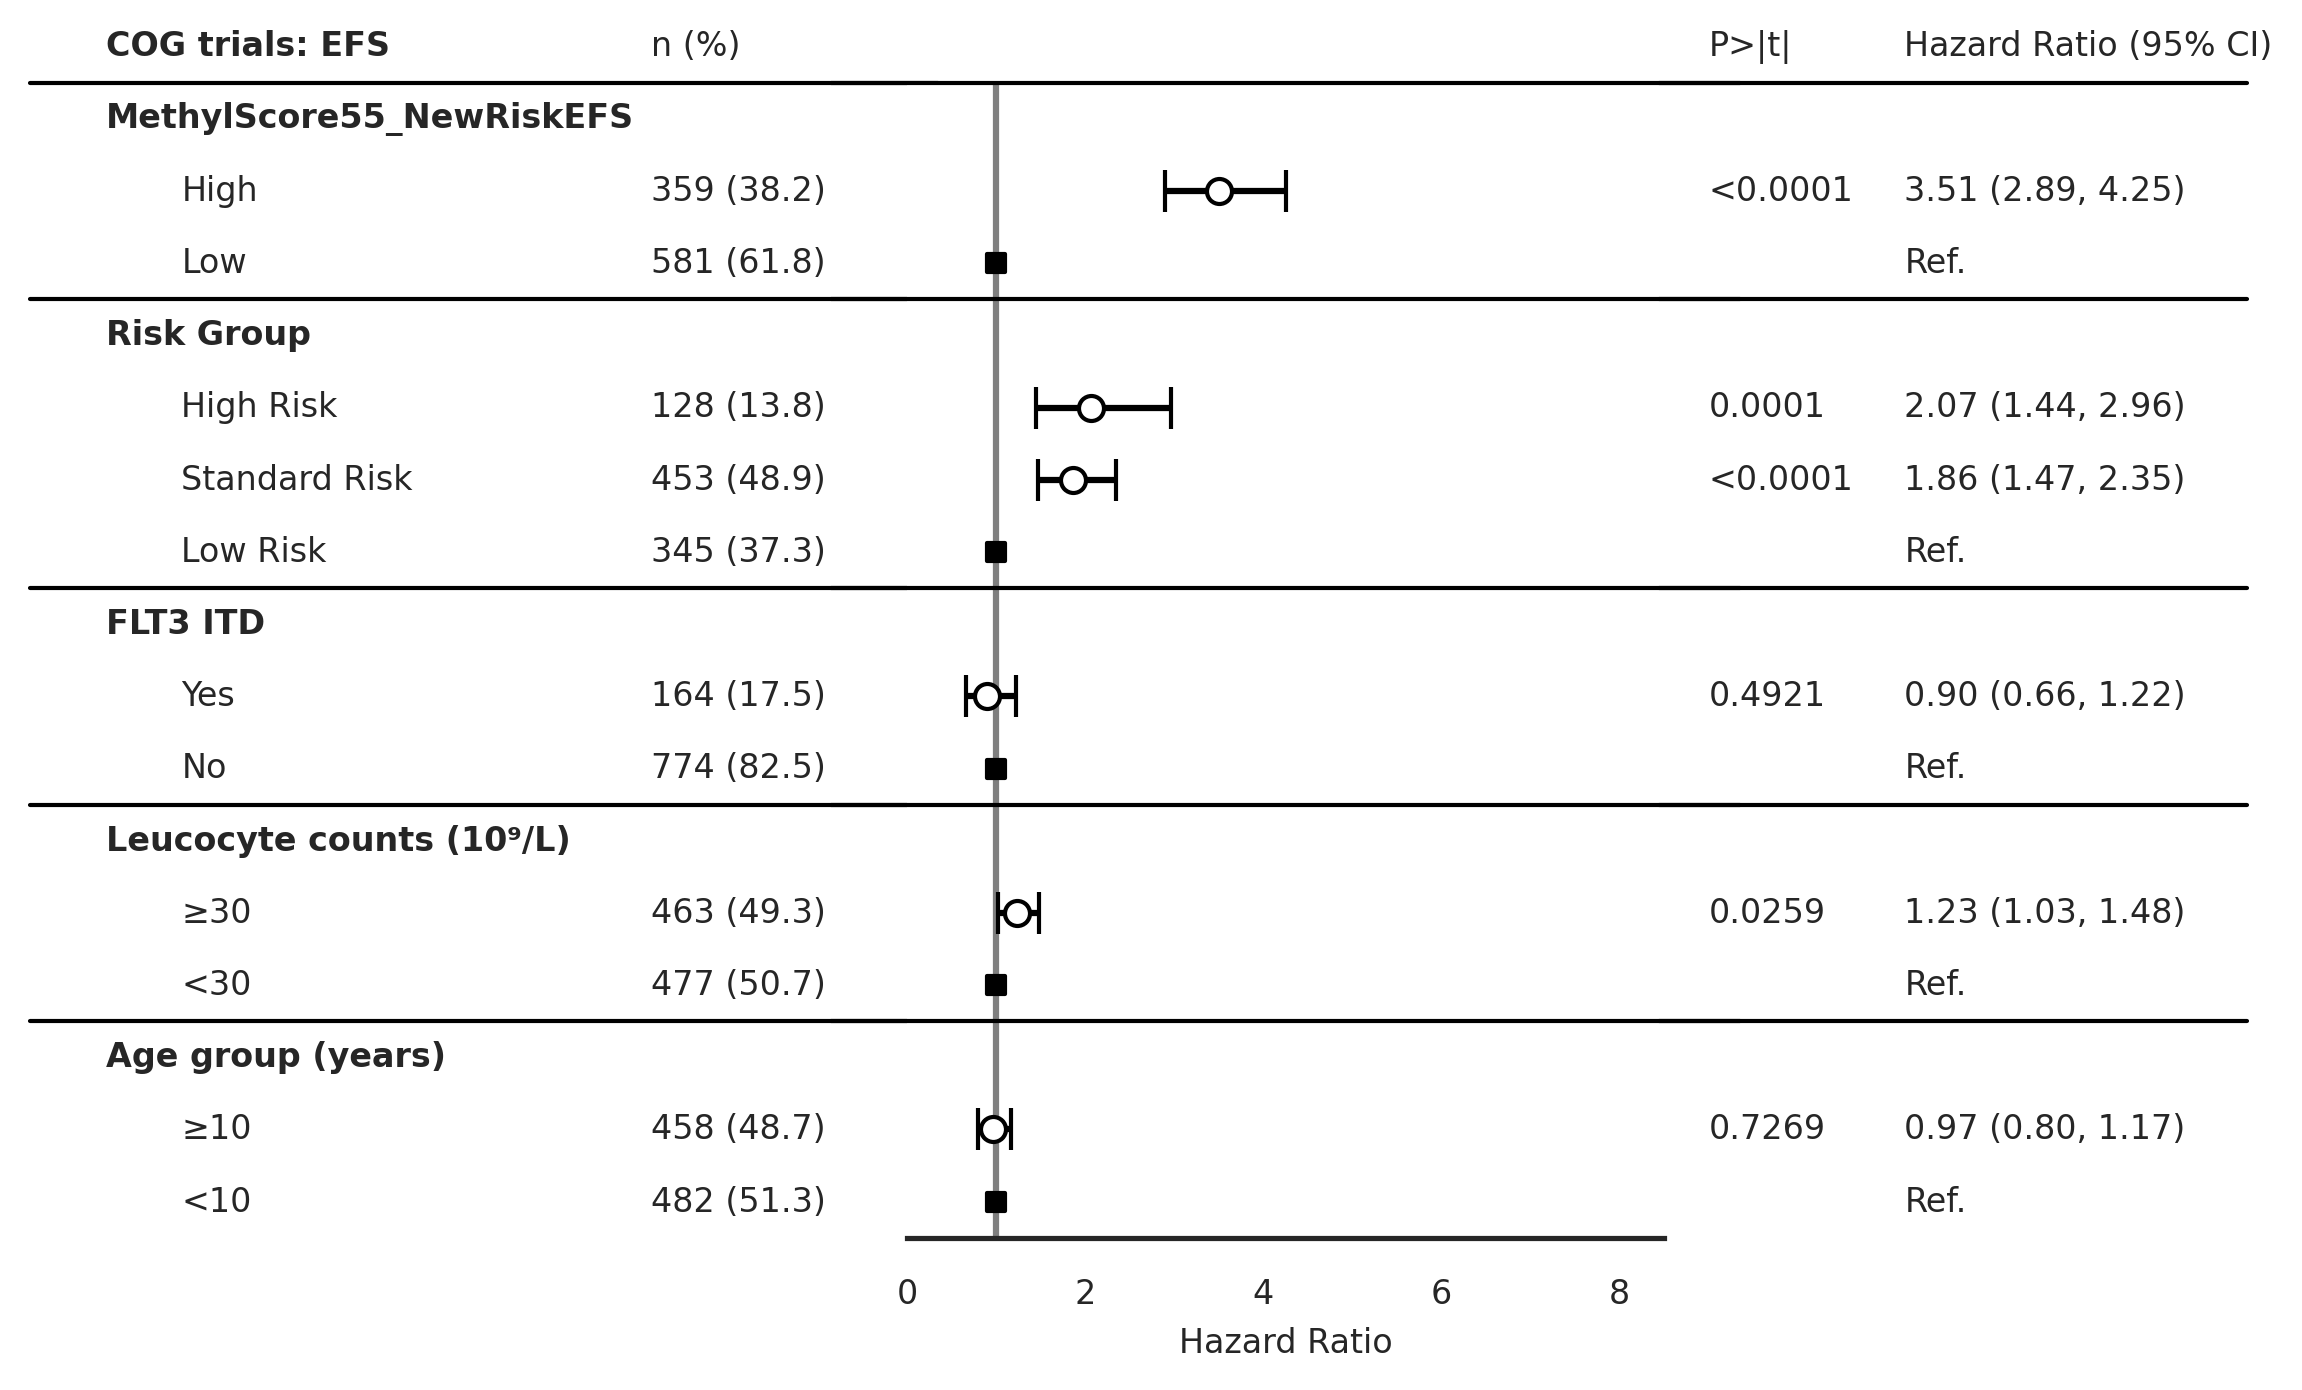

In [14]:
draw_forest_plot_noMRD(time='os.time',
                    event='os.evnt',
                    df=df,
                    trialname='COG trials:',
                    scorename=score_name,
                    save_plot=False)

draw_forest_plot_noMRD(time='efs.time',
                    event='efs.evnt',
                    df=df,
                    trialname='COG trials:',
                    scorename=score_name,
                    save_plot=False)

### ROC AUC

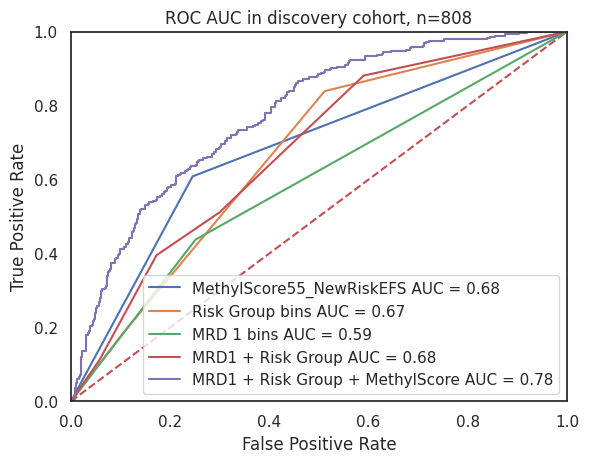

In [15]:
# Your current preprocessing
df['Risk Group bins'] = df['Risk Group'].replace({'Low Risk':0, 'Standard Risk':0.5, 'High Risk':1})
df['MRD 1 bins'] = df['MRD 1 Status'].replace({'Negative':0, 'Positive':1})
df2 = df[['os.evnt', score_name + '_cat_bin', 'Risk Group bins', 'MRD 1 bins']].dropna()

# rename column `MethylScoreAML_Px_cat_bin` to `MethylScoreAML Px`
df2 = df2.rename(columns={score_name + '_cat_bin':score_name})

# Add new columns based on standardized values
df2['MRD1 + Risk Group'] = df['MRD 1 bins'] + df['Risk Group bins']
df2['MRD1 + Risk Group + MethylScore'] = df['MRD 1 bins'] + df['Risk Group bins'] + df[score_name]


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def plot_roc_auc(df, score_columns, outcome_column, trial_name='discovery cohort'):
    """
    Plots the ROC AUC curves for multiple models given a dataframe and multiple score columns.
    
    Parameters:
    - df (pd.DataFrame): Dataframe containing the score and outcome columns.
    - score_columns (list of str): List of names of columns that contain the scores.
    - outcome_column (str): The name of the column that contains the true outcomes.
    
    Returns:
    None
    """
    
    plt.figure()
    plt.title('ROC AUC in ' + trial_name + ', n={}'.format(len(df)))
    
    # plot random guessing line
    plt.plot([0, 1], [0, 1], 'r--')

    # binarize the outcome variable
    lb = LabelBinarizer()
    lb.fit(df[outcome_column])
    y = lb.transform(df[outcome_column])
    
    # Loop over score_columns to plot multiple ROC curves
    for score_column in score_columns:
        
        # calculate the fpr and tpr for all thresholds of the classification
        fpr, tpr, threshold = roc_curve(y, df[score_column])
        roc_auc = auc(fpr, tpr)
        
        # plot ROC curve for this score_column
        plt.plot(fpr, tpr, label=f'{score_column} AUC = %0.2f' % roc_auc)

    # set x and y limits
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    # set x and y labels
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    # add legend
    plt.legend(loc='lower right')
    plt.show()

# Example Usage:
score_columns = [score_name, 'Risk Group bins', 'MRD 1 bins', 'MRD1 + Risk Group', 'MRD1 + Risk Group + MethylScore']
outcome_column = 'os.evnt'
plot_roc_auc(df2, score_columns, outcome_column)



### Box Plots

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

High Risk vs. Standard Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.000e+00 Stat=9.114e-01
Standard Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:5.739e-27 Stat=1.178e+02
High Risk vs. Low Risk: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.622e-17 Stat=7.473e+01


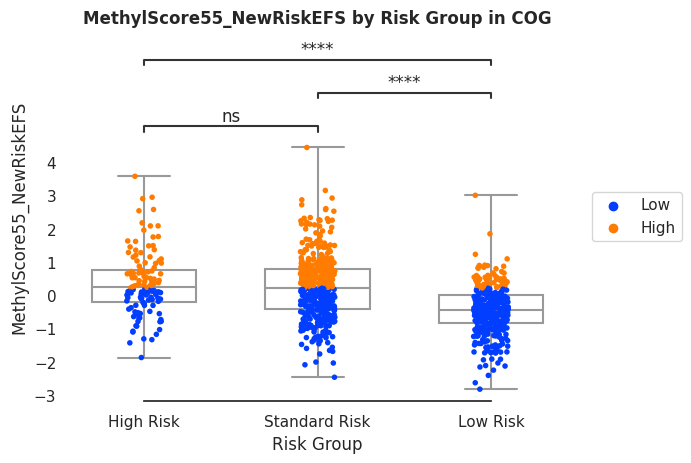

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Positive vs. Negative: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.266e-08 Stat=3.238e+01


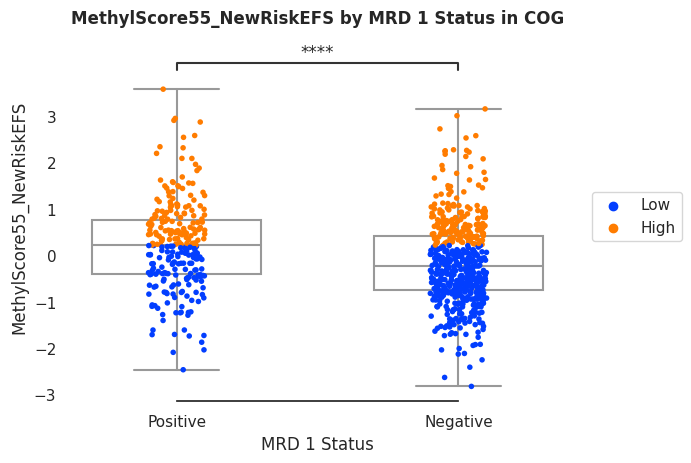

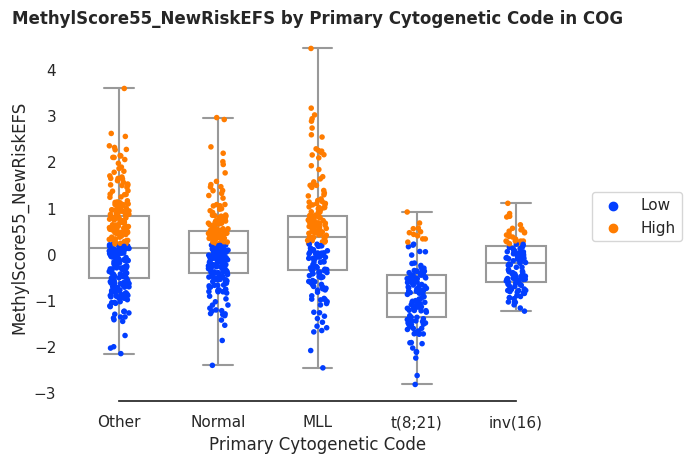

In [16]:
draw_boxplot(df=discovery_clinical_data,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='COG', hue=score_name + ' Categorical',
                save_plot=False, figsize=None)

draw_boxplot(df=discovery_clinical_data,x='MRD 1 Status', y=score_name,
                order=['Positive','Negative'],
                trialname='COG', hue=score_name + ' Categorical',
                save_plot=False, figsize=None)

draw_boxplot(df=discovery_clinical_data,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='COG', hue=score_name + ' Categorical',
                save_plot=False, figsize=None)

### Stacked Bar Plots

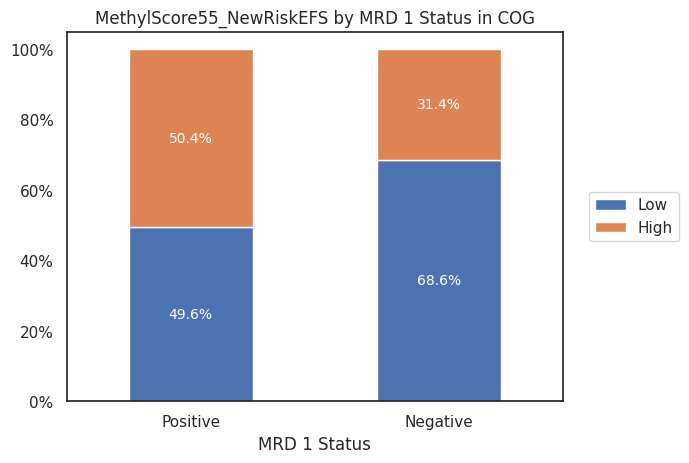

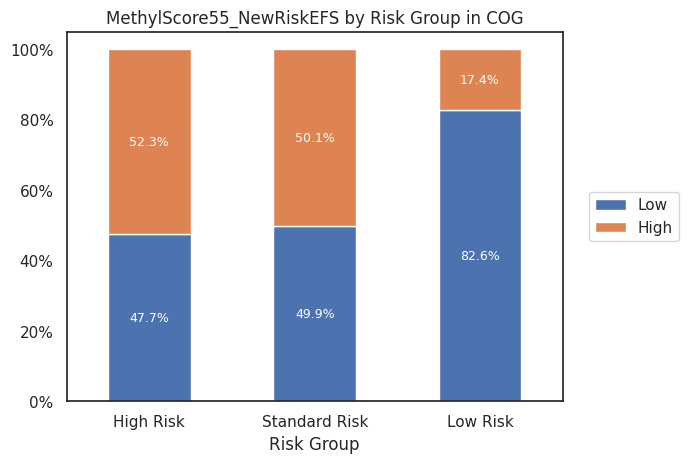

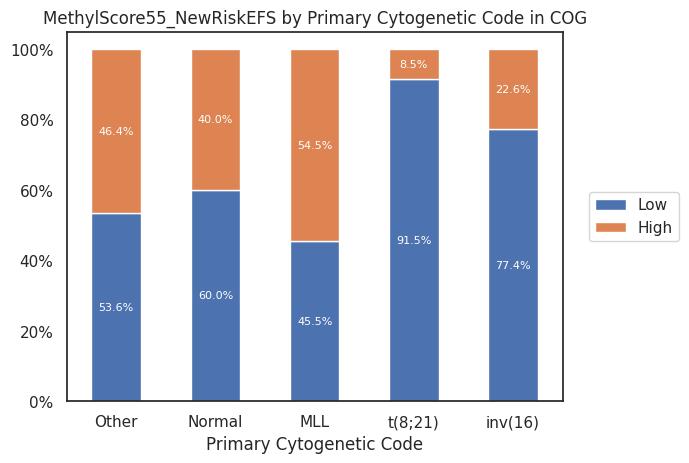

In [17]:
draw_stacked_barplot(df=discovery_clinical_data,x='MRD 1 Status', y=score_name,
             order=['Positive','Negative'],
             trialname='COG', hue=score_name + ' Categorical',
             save_plot=False, figsize=None)

draw_stacked_barplot(df=discovery_clinical_data,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='COG', hue=score_name + ' Categorical',
                save_plot=False, figsize=None, fontsize=9)

draw_stacked_barplot(df=discovery_clinical_data,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='COG', hue=score_name + ' Categorical',
                save_plot=False, figsize=None, fontsize=8)



### Patient Characteristics Table

#### Overall study population

In [18]:
from tableone import TableOne

columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD']

discovery_clinical_data['Age (years)'] = discovery_clinical_data['Age (years)'].astype(float)

mytable_cog = TableOne(discovery_clinical_data, columns,
                        overall=False, missing=True,
                        pval=False, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']})

# mytable_cog.to_csv(output_path + 'multivariate_cox_lasso/tableone_discovery_cohort.csv')

mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','Discovery Cohort','Low','p-value','Statistical Test'])

MethylScore55_NewRiskEFS,,Missing,Discovery Cohort
n,,,940
"Age (years), mean (SD)",,0,9.4 (6.3)
"Age group (years), n (%)",≥10,0,458 (48.7)
,<10,,482 (51.3)
"Sex, n (%)",Female,0,466 (49.6)
,Male,,474 (50.4)
"Race or ethnic group, n (%)",White,64,692 (79.0)
,Black or African American,,102 (11.6)
,Asian,,43 (4.9)
,American Indian or Alaska Native,,5 (0.6)


#### By MethylScore category

In [19]:
from tableone import TableOne

columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD']

discovery_clinical_data['Age (years)'] = discovery_clinical_data['Age (years)'].astype(float)

mytable_cog = TableOne(discovery_clinical_data, columns,
                        overall=False, missing=True,
                        pval=True, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby=score_name + ' Categorical')

mytable_cog.to_csv(output_path + 'multivariate_cox_lasso/tableone_discovery_methylscoreaml_px.csv')
mytable_cog.to_excel('../data/tableone_discovery_methylscoreaml_px.xlsx')

mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','High','Low','p-value','Statistical Test'])

MethylScore55_NewRiskEFS,,Missing,High,Low,p-value,Statistical Test
n,,,581,359,,
"Age (years), mean (SD)",,0,9.4 (6.4),9.3 (6.2),0.821,Two Sample T-test
"Age group (years), n (%)",≥10,0,277 (47.7),181 (50.4),0.453,Chi-squared
,<10,,304 (52.3),178 (49.6),,
"Sex, n (%)",Female,0,294 (50.6),172 (47.9),0.462,Chi-squared
,Male,,287 (49.4),187 (52.1),,
"Race or ethnic group, n (%)",White,64,428 (78.8),264 (79.3),0.254,Chi-squared (warning: expected count < 5)
,Black or African American,,56 (10.3),46 (13.8),,
,Asian,,29 (5.3),14 (4.2),,
,American Indian or Alaska Native,,4 (0.7),1 (0.3),,


## Fetch gene annotation

In [20]:
# Load manifest
zhou2016_probes = pd.read_csv(zhou2016_probes_path,sep='\t',
                    index_col=0)[['chrm','start', 'end', 'GeneNames','GeneClasses','CGIPosition']]

# Get probes from Zhou et al. (2016) that are in ewasOS_un.index
mean_coefs_genes = zhou2016_probes.loc[list(ewas_top_cpgs.columns)]\
                                    .join(mean_coefs.to_frame('MethylScore Coefficients'), how='left')\
                                    .sort_values(by='MethylScore Coefficients', ascending=False)

# `GeneNames`, `GeneClasses`, and `TranscriptIDs` columns contain multiple genes separated by `;` so we need to keep only the unique ones
mean_coefs_genes['GeneNames'] = mean_coefs_genes['GeneNames'].apply(lambda x: ';'.join(set(x.split(';'))))
mean_coefs_genes['GeneClasses'] = mean_coefs_genes['GeneClasses'].apply(lambda x: ';'.join(set(x.split(';'))))

# Transform `GeneNames` values separated by `;` into a list
mean_coefs_genes['GeneNames'] = mean_coefs_genes['GeneNames'].apply(lambda x: x.split(';'))

# If there are multiple genes in `GeneNames` or `GeneClasses`, we will add one row for each gene
mean_coefs_genes = mean_coefs_genes.explode('GeneNames')

# Save the dataframe to a CSV file
mean_coefs_genes.to_excel('../data/MethylScoreAML_Px_167_cpg_genes.xlsx')
mean_coefs_genes.to_csv(output_path + 'multivariate_cox_lasso/methylScore_coxph_167_cpg_signature.csv')


from itables import show

show(mean_coefs_genes, classes="display nowrap cell-border")


## Watermark

In [21]:
%load_ext watermark

In [22]:
# watermark with all libraries used in this notebook
%watermark -v -p pandas,seaborn,matplotlib,tableone,sklearn,lifelines,statannotations -a Francisco_Marchi@Lamba_Lab_UF -d -m

Author: Francisco_Marchi@Lamba_Lab_UF

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 8.12.2

pandas         : 2.0.2
seaborn        : 0.12.2
matplotlib     : 3.7.1
tableone       : 0.7.12
sklearn        : 1.2.2
lifelines      : 0.27.7
statannotations: 0.5.0

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 5.15.133.1-microsoft-standard-WSL2
Machine     : x86_64
Processor   : x86_64
CPU cores   : 20
Architecture: 64bit

